In [38]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train,  y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25)

print(X_train.shape, y_train.shape)

(45000, 28, 28) (45000,)


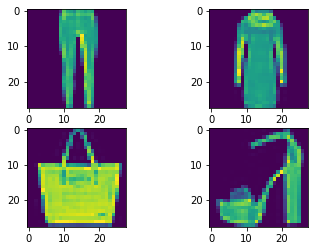

In [39]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[1][0].imshow(X_train[2])
ax[1][1].imshow(X_train[3])

In [40]:
import os
import time

root_logdir = os.path.join(os.curdir, "tf_logs")

def run_logdir():
    root_logdir = os.path.join(os.curdir, "tf_logs")
    run_id = time.strftime("%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


print(run_logdir())

.\tf_logs\2020_10_19-11_40_10


In [47]:
# record loss at each batch end
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss')) 

In [66]:
from tensorflow.keras import activations, layers, initializers, callbacks, models
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, BatchNormalization, ReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam, Adamax

es_cb = EarlyStopping(patience=3, monitor='val_loss') # early stopping at min loss
md_cb = ModelCheckpoint("f_mnist_model_A.h5", save_best_only=True) # setup a model check point
tb_cb = TensorBoard(run_logdir()) # tensorboard check point

sgd_vanilla = SGD(lr = 1e-3) # stochastic gradient descent
sgd_momentum = SGD(lr = 1e-3, momentum=0.9) # SGD with momentum, 0.9 is low friction, 0 is high friction, 
                                            # gradients at step t is the sum of all previous gradient with
                                            # momentum coefficient.
                                            # momentum <- momentum_term * momentum_prev + gradient
sgd_nesterove = SGD(lr = 1e-3, momentum=0.9, nesterov=True)
                                            # Nasterove is the same as momentum, but installed of increment step
                                            # adjustiment with gradient, but the gradient at the position where 
                                            # previous gradient may hav ebeen applied (an approximation of the next
                                            #position of the parameters). this is better for direction.
                                            # momentum <-  momentum_term * momentum_prev + gradient(weight + prev_momentum)
adagrad = Adagrad(lr = 1e-3, epsilon = 1e-7)
                                            # adaptive gradient is a way to adjust learning rate, by dividing lr to
                                            # sqrt of gradient vector scquared plus a very small value epsilon (to avoid
                                            # division by zero error), this tends to make lr too small so not 
                                            # reaching global optimum
                                            # lr is reduced as lr /sqrt(grad^2 + epsilon) 
                
rms = RMSprop(lr = 1e-3, epsilon = 1e-7, rho = 0.9)
                                            # same as above but adding a discounting factor and using. 

    
adam = Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999)
                                            # this is similar to both of the nesterove and adagrad, optimises both 
                                            # lr and momentum. The momentum decay parameter (beta_1) is normally defalting to 0.9 and
                                            # scaling decay parameter (beta_2) default to 0.999
    
optimisers = [sgd_vanilla, sgd_momentum, sgd_nesterove, adagrad, rms, adam]
runs = []
NUM_EPOCHS = 5

for opt in optimisers:
    keras.backend.clear_session()    
    model = Sequential([
        Flatten(input_shape=[28, 28]),
        BatchNormalization(),
        Dense(300, activation = "relu"),
        Dense(300, activation = "relu"),
        Dense(300, activation = "relu"),
        Dense(10, activation = "softmax")
    ])
    
    h = LossHistory()
    
    model.compile(optimizer =  opt, loss = "sparse_categorical_crossentropy", metrics = "accuracy")
    history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data = (X_valid, y_valid), callbacks = [h], 
                        verbose = False)
    print(model.evaluate(X_test, y_test))
    runs.append(h)
    

313/313 [==============================] - 0s 808us/step - loss: 0.4880 - accuracy: 0.8275
[0.4880031645298004, 0.8274999856948853]
313/313 [==============================] - 0s 844us/step - loss: 0.3690 - accuracy: 0.8707
[0.3690323531627655, 0.8707000017166138]
313/313 [==============================] - 0s 744us/step - loss: 0.3643 - accuracy: 0.8695
[0.36428290605545044, 0.8694999814033508]
313/313 [==============================] - 0s 767us/step - loss: 0.4251 - accuracy: 0.8444
[0.42512601613998413, 0.8443999886512756]
313/313 [==============================] - 0s 821us/step - loss: 4.9815 - accuracy: 0.8458
[4.981478691101074, 0.84579998254776]
313/313 [==============================] - 0s 843us/step - loss: 0.4027 - accuracy: 0.8645
[0.40266719460487366, 0.8644999861717224]


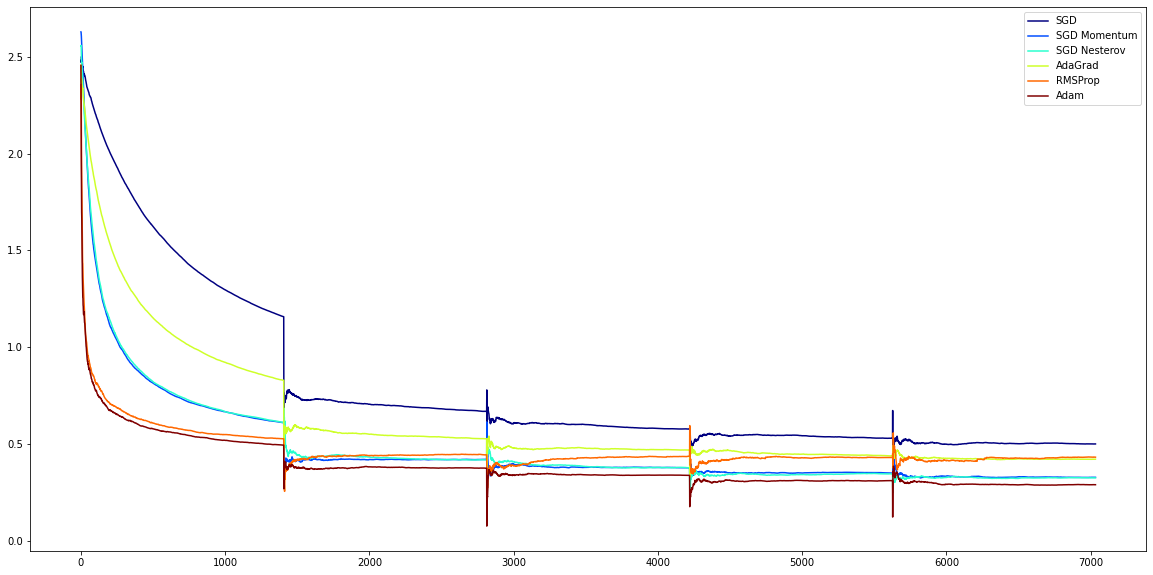

In [72]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)


colors = cm.jet(np.linspace(0, 1, 6))
x = range(len(runs[0].losses))

ax.plot(x, runs[0].losses, color = colors[0], label = "SGD")
ax.plot(x, runs[1].losses, color = colors[1], label = "SGD Momentum")
ax.plot(x, runs[2].losses, color = colors[2], label = "SGD Nesterov")
ax.plot(x, runs[3].losses, color = colors[3], label = "AdaGrad")
ax.plot(x, runs[4].losses, color = colors[4], label = "RMSProp")
ax.plot(x, runs[5].losses, color = colors[5], label = "Adam")


ax.legend()
plt.show()

In [1]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)

	modified:   ../python_topic_modelling (untracked content)
	modified:   0_keras_classification.ipynb
	modified:   2_tensor_board.ipynb
	modified:   5_transfer_learning.ipynb
	modified:   6_optimisers.ipynb
	modified:   7_learning_rate_scheduling.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [2]:
!git add 6_optimisers.ipynb
!git commit -m "added adam optimiser, adjusted chart for comparison"
!git push

The file will have its original line endings in your working directory


[master 4447c44] added adam optimiser, adjusted chart for comparison
 1 file changed, 289 insertions(+), 220 deletions(-)
 rewrite tensorflow/6_optimisers.ipynb (71%)


To https://github.com/auslei/python.git
   9b75d59..4447c44  master -> master
